<center><h2>DS102 King of the Hill (KOH) - 3</h2></center>
**Hackwagon Academy**

`HWA-DS102-KOH-A-3`
<hr>

## The Dataset

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period. It is taken from [Kaggle](https://www.kaggle.com/new-york-city/nyc-property-sales/home). The dataset is stored in `nyc-building-sales-25k.csv` and the the respective columns are:


`nyc-building-sales-25k.csv`

|column name|description|data type|example|
|:---:|:---:|:---:|:---:|
|BOROUGH|The borough a building is in|int|4|
|NEIGHBORHOOD|The neighborhood a building is in|str|CLINTON HILL|
|BUILDING CLASS CATEGORY|The class category of a build|str|01 ONE FAMILY DWELLINGS|
|BLOCK|The block of a building|int|923|
|ADDRESS|The address of a building|str|1541 METROPOLITAN AVENUE|
|RESIDENTIAL UNITS|The number of residential units a building has|int|4|
|COMMERCIAL UNITS| The number of commercial units a building has|int|1|
|LAND SQUARE FEET| The net square feet is the total square footage of all the rooms/areas on a floor. This includes assignable and non-assignable rooms|int|1967|
|GROSS SQUARE FEET|The gross square feet is calculated from the outside of the exterior walls and is inclusive of all space within minus areas that are open to below|int|2400
|YEAR BUILT|The year a building was built|int|1901|
|SALE PRICE|The sale price of a building|int|995000|

## The Task

There is one challenge in this KOH, broken into 3 parts. Complete all parts to plot the final line graph.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

### Read from CSV to `df`
First, read the dataset into a `DataFrame`. Also, perform sanity checks on the dataset.

In [8]:
df = pd.read_csv('nyc-building-sales-25k.csv')

In [9]:
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1982,39 BOONE STREET,2,0,4600,2188,1960,720000
1,3,WINDSOR TERRACE,02 TWO FAMILY DWELLINGS,1115,230 WINDSOR PLACE,2,0,2000,2128,1901,0
2,5,WEST NEW BRIGHTON,02 TWO FAMILY DWELLINGS,228,45 FLOYD STREET,2,0,3900,2400,1920,515000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
BOROUGH                    25000 non-null int64
NEIGHBORHOOD               25000 non-null object
BUILDING CLASS CATEGORY    25000 non-null object
BLOCK                      25000 non-null int64
ADDRESS                    25000 non-null object
RESIDENTIAL UNITS          25000 non-null int64
COMMERCIAL UNITS           25000 non-null int64
LAND SQUARE FEET           25000 non-null int64
GROSS SQUARE FEET          25000 non-null int64
YEAR BUILT                 25000 non-null int64
SALE PRICE                 25000 non-null int64
dtypes: int64(8), object(3)
memory usage: 2.1+ MB


In [11]:
# Summary statistics of key numeric variables
df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,25000.00,25000.00,25000.00,25000.00,25000.00
mean,2.52,0.32,3264.84,3771.05,1258180.54
std,17.76,15.13,31715.63,35212.43,17828273.77
min,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,1433.00,840.00,88000.00
50%,1.00,0.00,2133.00,1620.00,480000.00
75%,2.00,0.00,3090.00,2520.00,830000.00
max,1844.00,2261.00,4228300.00,3750565.00,2210000000.00


### Challenge

Plot a line graph to show how the mean of `GROSS SQUARE FEET` of buildings have changed over time, from 2007 to 2017.

1. Filter for all buildings built from 2007 to 2017 (inclusive). Keep all buildings where the `GROSS SQUARE FEET` $ >0$.
2. Create an aggregated `df` where the first column is the `YEAR BUILT` and the second column is the **mean** of the `GROSS SQUARE FEET` of all buildings built in that year.
3. Plot a **line graph** where the $x$-axis is the **year built** and the $y$-axis is the **mean gross square feet**. Be sure to include the title, $x$-axis label, $y$-axis label and legend. 

In [29]:
# step 1

df_filt = df['YEAR BUILT'] >= 2007
df_filt2 = df['YEAR BUILT'] <= 2017

df_filter  = df[df_filt & df_filt2 ]

df_filt3 = df['GROSS SQUARE FEET'] > 0

df_filter = df_filter[df_filt3]

c:\users\jerms\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [30]:
# Step 2
df_group = df_filter.groupby(['YEAR BUILT'], as_index=False).agg({"GROSS SQUARE FEET": "mean"})


Text(0, 0.5, 'Mean Gross Square Feet')

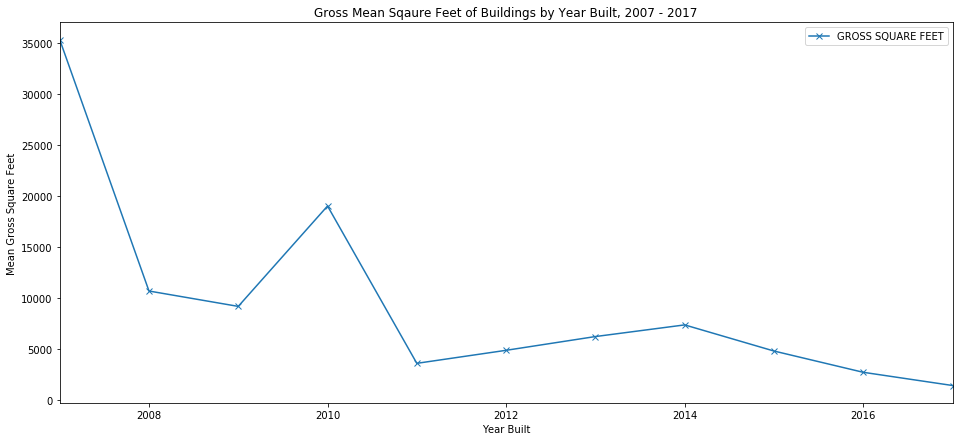

In [33]:
# Step 3
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

# Set the title here
ax.set_title("Gross Mean Sqaure Feet of Buildings by Year Built, 2007 - 2017")

df_group.plot(kind='line',x='YEAR BUILT', y='GROSS SQUARE FEET', ax=ax, marker="x",figsize=(16, 7))

#Set the y axis label here
ax.set_xlabel("Year Built")
ax.set_ylabel("Mean Gross Square Feet")


## Submit Plot

When you have completed plotting the graph, show it to the teaching team. Did you get the correct plot to the KOH this week?